

Shaik Davood Rabbani(1002085406)
Kavya Malempati(1002067867) 
Nirmala Sahani Allam(1002058435) 
Sai Sandeep Chintala(1002082498)

In [13]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [14]:
#Reading the data from the dataset
t_data=pd.read_csv("dataset_DT.csv")
t_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,blue-collar,single,secondary,no,13408.0,no,no,cellular,1.0,apr,647.0,2.0,-1.0,0.0,unknown,no
1,49.0,management,divorced,tertiary,no,20727.0,no,no,cellular,1.0,apr,285.0,3.0,132.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,cellular,1.0,apr,1156.0,1.0,261.0,3.0,other,no
3,46.0,management,divorced,tertiary,no,10469.0,yes,no,cellular,1.0,apr,202.0,2.0,-1.0,0.0,unknown,no
4,26.0,management,single,tertiary,no,7628.0,no,no,cellular,1.0,apr,263.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,41.0,technician,married,secondary,no,2152.0,no,no,cellular,30.0,sep,134.0,1.0,121.0,1.0,other,no
18419,57.0,management,married,unknown,no,0.0,no,no,cellular,30.0,sep,585.0,1.0,-1.0,0.0,unknown,no
18420,40.0,blue-collar,married,secondary,no,1451.0,no,no,cellular,30.0,sep,117.0,1.0,121.0,1.0,success,yes
18421,38.0,technician,single,secondary,no,1711.0,no,no,telephone,30.0,sep,234.0,1.0,-1.0,0.0,unknown,yes


In [15]:
#checking if there are any null values
n_values=t_data.isnull().sum()
print(n_values)

age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month        314
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [16]:
#checking for any column value is "unknown"
n_values1=t_data.applymap(lambda x:x=="unknown").sum()
print(n_values1)

age              0
job            112
marital          0
education      753
default          0
balance          0
housing          0
loan             0
contact       4313
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     13259
y                0
dtype: int64


In [17]:
#total null values and column value with "unknown" that to be handled
print(n_values+n_values1)

age              0
job            112
marital          0
education     1073
default          0
balance          0
housing          0
loan             0
contact       4313
day            306
month          314
duration         0
campaign         0
pdays            0
previous         0
poutcome     13259
y                0
dtype: int64


In [18]:
count=t_data['job'].value_counts()
print(count)

management       4082
blue-collar      3722
technician       2949
admin.           2012
services         1582
retired          1176
self-employed     670
entrepreneur      588
unemployed        560
student           507
housemaid         463
unknown           112
Name: job, dtype: int64


In [19]:
#handling the null values and unknown values with most frequently seen value i.e.,mode of that attribute
mf1=t_data['job'].mode()[0]
t_data['job']=t_data['job'].replace('unknown',mf1)
mf2=t_data['day'].mode()[0]
t_data['day']=t_data['day'].fillna(mf2)
mf3=t_data['month'].mode()[0]
t_data['month']=t_data['month'].fillna(mf3)
mf4=t_data['education'].mode()[0]
t_data['education']=t_data['education'].replace('unknown',mf4)
t_data['education']=t_data['education'].fillna(mf4)
mf5=t_data['contact'].mode()[0]
t_data['contact']=t_data['contact'].replace('unknown',mf5)

In [20]:
#handling all the null values is done. For poutcome the attributes with value "unknown" is large in number. so we cannot drop them or change it with some other value because it may effect the decision.so we can create outcome as another value in this attribute.
n_values=t_data.isnull().sum()
n_values1=t_data.applymap(lambda x:x=="unknown").sum()
print(n_values+n_values1)

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     13259
y                0
dtype: int64


In [21]:
#Categorizing the attributes values
t_data['job'].replace({'management':0,'blue-collar':1,'technician':2,'admin.':3,'services':4,'retired':5,'self-employed':6,'entrepreneur':7,'unemployed':8,'housemaid':10,'student':9},inplace=True)
t_data['marital'].replace({'married':0,'single':1,'divorced':2},inplace=True)
t_data['education'].replace({'primary':0,'secondary':1,'tertiary':2},inplace=True)
t_data['default'].replace({'no':0,'yes':1},inplace=True)
t_data['housing'].replace({'no':0,'yes':1},inplace=True)
t_data['loan'].replace({'no':0,'yes':1},inplace=True)
t_data['contact'].replace({'cellular':0,'telephone':1},inplace=True)
t_data['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},inplace=True)
t_data['poutcome'].replace({'failure':0,'success':1,'other':2,'unknown':3},inplace=True)
t_data['y'].replace({'no':0,'yes':1},inplace=True)
t_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,1,1,1,0,13408.0,0,0,0,1.0,4,647.0,2.0,-1.0,0.0,3,0
1,49.0,0,2,2,0,20727.0,0,0,0,1.0,4,285.0,3.0,132.0,2.0,0,0
2,32.0,4,1,2,0,1743.0,1,0,0,1.0,4,1156.0,1.0,261.0,3.0,2,0
3,46.0,0,2,2,0,10469.0,1,0,0,1.0,4,202.0,2.0,-1.0,0.0,3,0
4,26.0,0,1,2,0,7628.0,0,0,0,1.0,4,263.0,1.0,-1.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,41.0,2,0,1,0,2152.0,0,0,0,30.0,9,134.0,1.0,121.0,1.0,2,0
18419,57.0,0,0,1,0,0.0,0,0,0,30.0,9,585.0,1.0,-1.0,0.0,3,0
18420,40.0,1,0,1,0,1451.0,0,0,0,30.0,9,117.0,1.0,121.0,1.0,1,1
18421,38.0,2,1,1,0,1711.0,0,0,1,30.0,9,234.0,1.0,-1.0,0.0,3,1


In [22]:
count=t_data['y'].value_counts()
print(count)

0    13134
1     5289
Name: y, dtype: int64


In this we used Bar chart for visualizing Marital attribute on x-axis with respect to target variable. hue parameter is splitted based on target variable values. The boxes represent Yes or no for each value of x-axis. After categorizing the data on x-axis 0 means married where no(0) is high compared to yes(1). 1 means single where no is high compared to yes. 2 means divorced where the difference is low when compared to others.

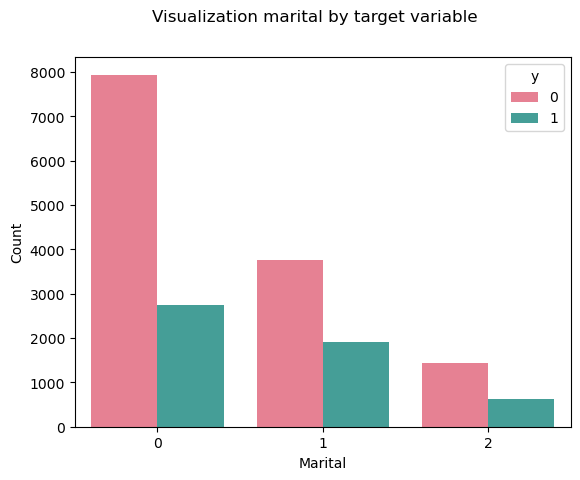

In [32]:
sns.countplot(x='marital',hue='y',data=t_data,palette='husl')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.suptitle('Visualization of marital by target variable')
plt.show()

In this we used Box plot for visualizing Balance attribute on y axis with respect to target variable on x axis. By observing visualization we can say that there are less minimum outliers when compared to maximum outliers in both cases. The highest value for the balance attribute is for no i.e., the client didn't subscribed the term deposit.

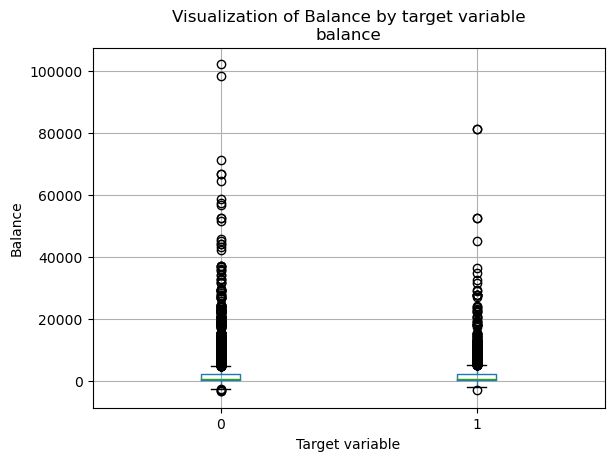

In [39]:
t_data.boxplot(column="balance",by="y")
plt.xlabel("Target variable")
plt.ylabel("Balance")
plt.suptitle("Visualization of Balance by target variable")
plt.show()

In [24]:
# splitting the data into testing and training. Based on the splitted data the importance of the attributes is generated. The first 6 attributes are printed as their importance is high.
target_attr=t_data['y']
feature_attr=t_data.drop('y',axis=1)
x_train,x_test,y_train,y_test=train_test_split(feature_attr,target_attr,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
#Calculating importance of the attributes and keeping them in the ascending order. 
#Finding the importance of each attribute with respect to the target attribute.
importance=pd.DataFrame(model.feature_importances_,index=x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
fea=importance[:6]
print(importance)
print("-----------")
print(fea)

           importance
duration     0.213525
day          0.120594
balance      0.113578
age          0.111374
month        0.109825
pdays        0.072449
job          0.049649
housing      0.049506
campaign     0.041749
poutcome     0.040783
education    0.024973
previous     0.016735
marital      0.016371
loan         0.010586
contact      0.005350
default      0.002953
-----------
          importance
duration    0.213525
day         0.120594
balance     0.113578
age         0.111374
month       0.109825
pdays       0.072449


In [25]:
# Splitting the dataset 0.75 for taining and 0.25 for testing
train_x,test_x,train_y,test_y=train_test_split(feature_attr,target_attr,test_size=0.25,random_state=42)
print(train_x)

        age  job  marital  education  default  balance  housing  loan  \
9222   59.0    5        0          0        0   1930.0        0     0   
17799  34.0    2        1          1        0   1279.0        1     0   
13842  40.0    1        0          1        0      0.0        1     0   
2122   48.0    0        0          1        0   4415.0        1     0   
2673   29.0    9        1          1        0    314.0        0     0   
...     ...  ...      ...        ...      ...      ...      ...   ...   
11284  33.0    0        0          2        0    442.0        1     0   
11964  38.0    3        1          1        0   3049.0        1     1   
5390   28.0    2        1          2        0    102.0        0     0   
860    39.0    1        0          0        0    390.0        1     0   
15795  72.0    5        0          1        0   4130.0        0     0   

       contact   day  month  duration  campaign  pdays  previous  poutcome  
9222         0  11.0      6     453.0       1.

In [26]:
#calculating gini and entropy scores of the splitted data
data_gini=DecisionTreeClassifier(criterion='gini',max_depth=80,min_samples_leaf=60)
data_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=80,min_samples_leaf=60)
data_gini.fit(train_x,train_y)
data_entropy.fit(train_x,train_y)
pred_gini=data_gini.predict(test_x)
pred_entropy=data_entropy.predict(test_x)
gini_score=data_gini.score(test_x,test_y)
entropy_score=data_entropy.score(test_x,test_y)
print(gini_score)
print(entropy_score)

0.7783326096396005
0.776595744680851


[[2606  628]
 [ 672  700]]


Text(0.5, 0.98, 'ConfusionMatrix')

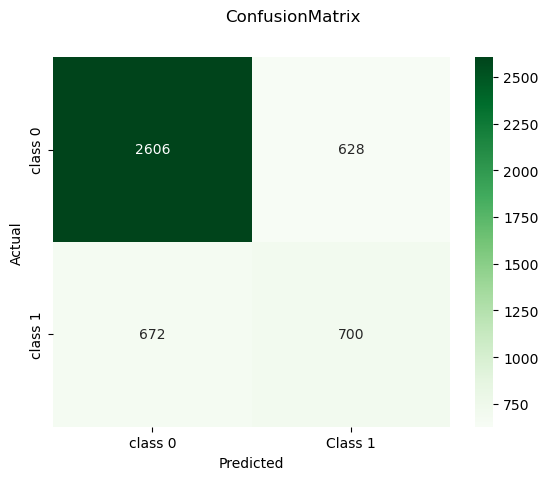

In [27]:
#Calculating Confusion Matrix  
model1=DecisionTreeClassifier()
model1.fit(train_x,train_y)
pred_y= model1.predict(test_x)
conf_matrix=confusion_matrix(test_y,pred_y)
print(conf_matrix)
#Representing the graphical form of confusion matrix using heat map
sns.heatmap(conf_matrix,annot=True,cmap="Greens",fmt="d",xticklabels=['class 0','Class 1'],yticklabels=['class 0','class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.suptitle('ConfusionMatrix')


In [28]:
#classification report of the data which includes precision,recall,f1-score,support
classi_report=classification_report(test_y,pred_y)
print(classi_report)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3234
           1       0.53      0.51      0.52      1372

    accuracy                           0.72      4606
   macro avg       0.66      0.66      0.66      4606
weighted avg       0.72      0.72      0.72      4606



In [29]:
#Calculating the result of the classifier using gini
precision_gini=precision_score(test_y,pred_gini,average='weighted')
recall_gini=recall_score(test_y,pred_gini,average='weighted')
f1_score_gini=f1_score(test_y,pred_gini,average='weighted')
acc_score_gini=accuracy_score(test_y,pred_gini)

#Calculating the result of the classifier using entropy
precision_entropy=precision_score(test_y,pred_entropy,average='weighted')
recall_entropy=recall_score(test_y,pred_entropy,average='weighted')
f1_score_entropy=f1_score(test_y,pred_entropy,average='weighted')
acc_score_entropy=accuracy_score(test_y,pred_entropy)

#Gini results
print("Gini")
print("Accuracy:",acc_score_gini);
print("Precision:",precision_gini);
print("f1-Score:",f1_score_gini);
print("Recall:",recall_gini);

#Entropy results
print("Entropy")
print("Accuracy:",acc_score_entropy);
print("Precision:",precision_entropy);
print("f1-Score:",f1_score_entropy);
print("Recall:",recall_entropy);


Gini
Accuracy: 0.7783326096396005
Precision: 0.7716319376385191
f1-Score: 0.7737619722472896
Recall: 0.7783326096396005
Entropy
Accuracy: 0.776595744680851
Precision: 0.7686477392996909
f1-Score: 0.7707565153961158
Recall: 0.776595744680851


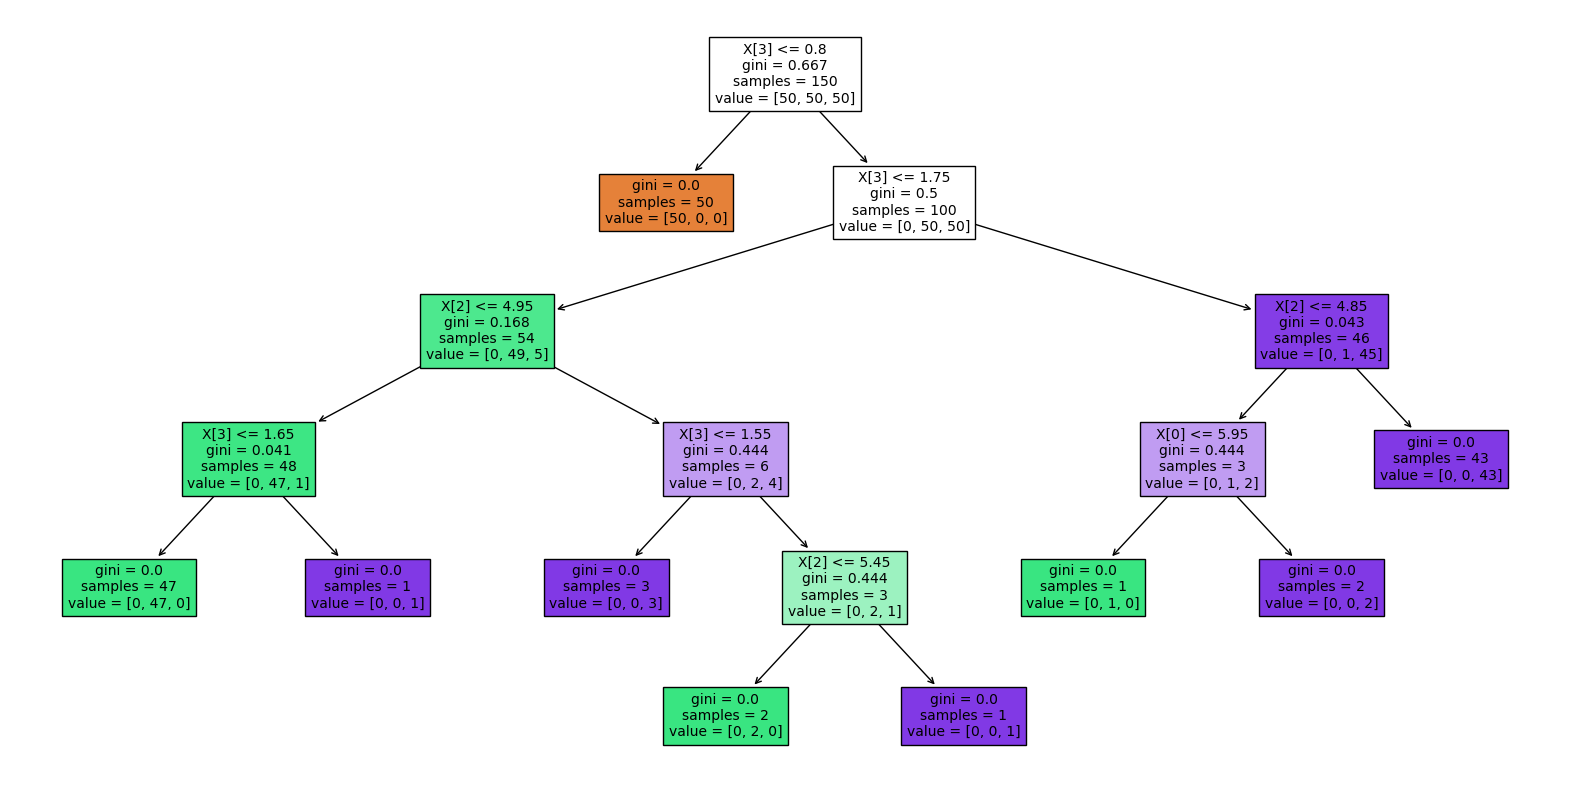

In [146]:
# Visualization of Decision tree with a depth of 5
model2=DecisionTreeClassifier(max_depth=5)
model2.fit(feature_attr,target_attr)

plt.subplots(figsize=(20,10))
cn=['yes','no']
plot_tree(clf,filled=True,fontsize=10)
plt.show()

Contribution by Each Team Member
Decision Tree
Kavya Malempati and Sai Sandeep worked on this part
KNN
Nirmala Sahani Allamand Shaik Davood Rabbani worked on this part
Naive Bayes
Kavya Malempati,Shaik Davood Rabbani,Nirmala Sahani Allam,Sai Sandeep all together worked on this part.